In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model 
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X= iris.data
Y= iris.target

In [5]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris_data=DataFrame(X,
                    columns=['Sepal Length','Sepal Width'
                             ,'Petal Length','Petal Width'])


In [7]:
iris_target=DataFrame(Y,columns=['Species'])


In [8]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


rename targets to actual names

In [10]:
def flower (num):
    if num ==0:
        return 'Setosa'
    elif num ==1:
        return 'Versicolour'
    else :
        return 'Virginica'

In [11]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [12]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [14]:
# columns => ,axis=1
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


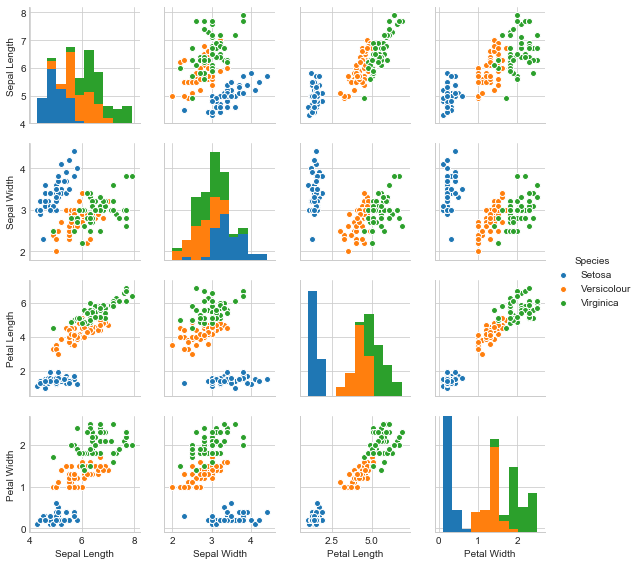

In [15]:
sns.pairplot(iris,hue='Species',size=2)

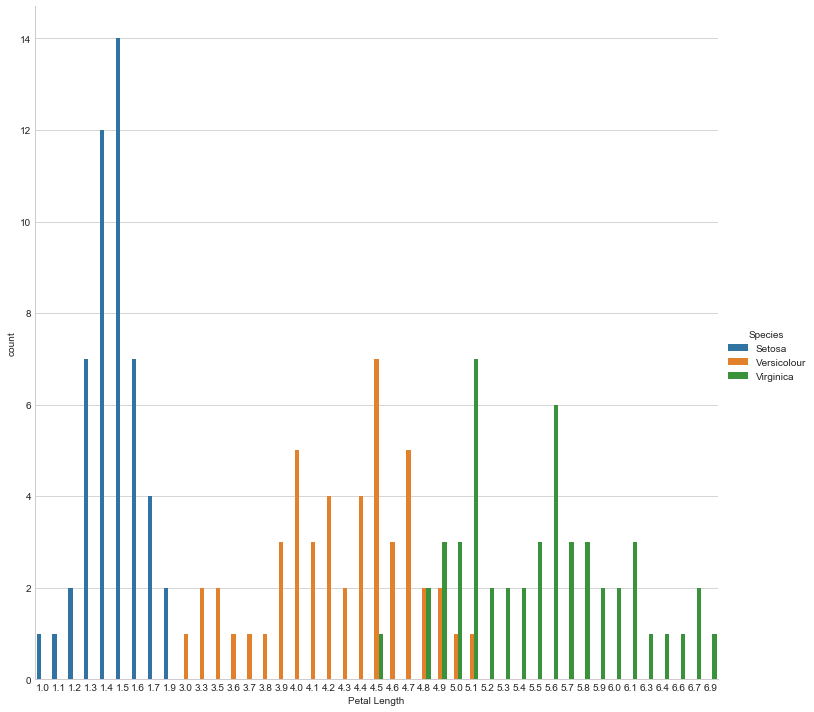

In [18]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind="count")

# Part2

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/raka/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


sklearn.cross_validation is deprecated, use replacement 

-from sklearn import cross_validation
+from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
logreg=LogisticRegression()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4
                                               ,random_state=3)
#random_state specifing the alghoritm for random numbers

In [24]:
#training model with the training set 
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
#testing accuracy

In [27]:
from sklearn import metrics 

In [28]:
Y_pred=logreg.predict(X_test)

In [29]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [30]:
#indicating the accuracy level of the generated model through training datasets

In [32]:
#how to know that this accuracy is good enough

In [34]:
#according to the data visualization this model should be very strong model and a high accuracy is axpected

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=6)

In [60]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [61]:
 Y_pred=knn.predict(X_test)

In [62]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [63]:
knn = KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [65]:
 Y_pred=knn.predict(X_test)

In [66]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


so its is so important to know the optimal k value and here at the bottom of this note there are alot of resources that
    discuss above this issue

In [68]:
# for small size datasets we can do this :

In [69]:
k_range=range(1,21)

In [70]:
accuracy=[]

In [72]:
for k in k_range :
    knn=k=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred= knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Testing Accuracy')

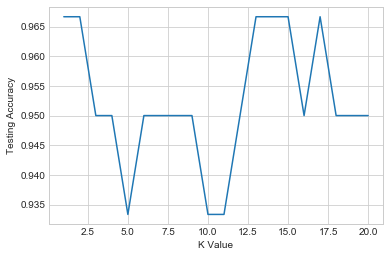

In [73]:
plt.plot(k_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')